In [25]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read in the excel file in excel_data folder
df = pd.read_excel('../all_genes_data/all_genes_data.xlsx', sheet_name='Sheet1', skiprows=7, names=['Target', 'ac', 'ac2', 'ac3', 'MRC5', 'MRC52', 'MRC53', 'hOB', 'hOB2', 'hOB3'])

# make the Target column the index
df.set_index('Target', inplace=True)
df.head()

,ac,ac2,ac3,MRC5,MRC52,MRC53,hOB,hOB2,hOB3
Target,,,,,,,,,
SPRY4,3.730821,3.798188,3.451263,3.497535,3.689837,3.552548,3.900631,4.094785,3.828594
GTF2H3,3.515030,3.485248,3.169992,2.932415,3.209663,2.437185,2.662102,3.085906,3.073130
FCGR3A/B,3.281045,3.664448,3.573407,2.681745,2.912696,2.343588,2.856153,2.221520,3.023712
ATG5,3.470017,3.579098,3.131463,3.525251,3.321418,3.567146,2.779095,3.477778,3.437836
GLUD1,3.178131,3.400363,3.312186,2.951279,2.739936,2.616457,2.603546,3.368913,2.745644


In [27]:
df_ttest = df.copy()

# make new columns for the average of each group
df_ttest['hOB_avg'] = df_ttest[['hOB', 'hOB2', 'hOB3']].mean(axis=1)
df_ttest['ac_avg'] = df_ttest[['ac', 'ac2', 'ac3']].mean(axis=1)
df_ttest['MRC5_avg'] = df_ttest[['MRC5', 'MRC52', 'MRC53']].mean(axis=1)

# make new dataframe for each group
df_hOB = df_ttest[['hOB', 'hOB2', 'hOB3']].T
df_ac = df_ttest[['ac', 'ac2', 'ac3']].T
df_MRC5 = df_ttest[['MRC5', 'MRC52', 'MRC53']].T

In [28]:
gene_list = df_ttest.index.values.tolist()

## T-test which genes were differentially expressed hOB vs MRC5

In [29]:
hOB_vs_MRC5_changed_genes = []

for gene in gene_list:
    stat, pval = stats.ttest_ind(df_hOB[gene], df_MRC5[gene])
    if pval < 0.05:
        hOB_vs_MRC5_changed_genes.append(gene)

print('no. of genes that changed in MRC5 vs hOB: ', len(hOB_vs_MRC5_changed_genes))
print('% of genes that changed in MRC5 vs hOB: ', 100*len(hOB_vs_MRC5_changed_genes)/len(gene_list))

no. of genes that changed in MRC5 vs hOB:  355
% of genes that changed in MRC5 vs hOB:  26.63165791447862


In [30]:
# find no. of genes that increased in MRC5 vs hOB
MRC5_up_vs_hOB_genes = []

for gene in hOB_vs_MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] > df_ttest.loc[gene, 'hOB_avg']:
        MRC5_up_vs_hOB_genes.append(gene)

print('no. of genes that increased in MRC5 vs hOB: ', len(MRC5_up_vs_hOB_genes))
print('percentge of genes that increased in MRC5 vs hOB: ', 100*len(MRC5_up_vs_hOB_genes)/len(hOB_vs_MRC5_changed_genes))
print('percentage of total genes that increased in MRC5 vs hOB: ', 100*len(MRC5_up_vs_hOB_genes)/len(gene_list))

# find no of genes that decreased in MRC5 vs hOB
MRC5_down_vs_hOB_genes = []

for gene in hOB_vs_MRC5_changed_genes:
    if df_ttest.loc[gene, 'MRC5_avg'] < df_ttest.loc[gene, 'hOB_avg']:
        MRC5_down_vs_hOB_genes.append(gene)

print('no. of genes that decreased in MRC5 vs hOB: ', len(MRC5_down_vs_hOB_genes))
print('percentge of genes that decreased in MRC5 vs hOB: ', 100*len(MRC5_down_vs_hOB_genes)/len(hOB_vs_MRC5_changed_genes))
print('percentage of total genes that decreased in MRC5 vs hOB: ', 100*len(MRC5_down_vs_hOB_genes)/len(gene_list))

no. of genes that increased in MRC5 vs hOB:  182
percentge of genes that increased in MRC5 vs hOB:  51.267605633802816
percentage of total genes that increased in MRC5 vs hOB:  13.653413353338335
no. of genes that decreased in MRC5 vs hOB:  173
percentge of genes that decreased in MRC5 vs hOB:  48.732394366197184
percentage of total genes that decreased in MRC5 vs hOB:  12.978244561140285


In [31]:
MRC_down_hOB_genes_fold_2 = []

for gene in MRC5_up_vs_hOB_genes:
    if df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'hOB_avg'] >= 2:
        MRC_down_hOB_genes_fold_2.append(gene)

print('no. of genes that decreased in MRC5 vs hOB and fold change >= 2: ', len(MRC_down_hOB_genes_fold_2))

MRC_up_hOB_genes_fold_2 = []

for gene in MRC5_down_vs_hOB_genes:
    if df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'hOB_avg'] <= 0.5:
        MRC_up_hOB_genes_fold_2.append(gene)

print('no. of genes that increased in MRC5 vs hOB and fold change >= 2: ', len(MRC_up_hOB_genes_fold_2))

no. of genes that decreased in MRC5 vs hOB and fold change >= 2:  8
no. of genes that increased in MRC5 vs hOB and fold change >= 2:  6


## Donut plot for MRC5 vs hOB expression difference

In [32]:
percent_list = [len(MRC5_up_vs_hOB_genes)/len(gene_list), len(MRC5_down_vs_hOB_genes)/len(gene_list)]

changed_percent = np.sum(percent_list)

percent_list.append(1-changed_percent)

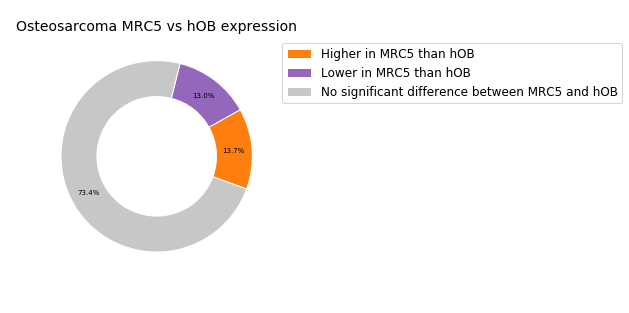

In [33]:
cmap = plt.get_cmap("tab20")
colors = cmap([2, 8, 15]) 

fig, ax = plt.subplots(figsize =(5.5, 5.5))

size = 0.3

_, _, inner_autotext = ax.pie(percent_list, radius=0.8, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%', pctdistance=0.8, textprops=dict(fontsize=7), startangle=-20)

# make legend 
labels = ['Higher in MRC5 than hOB', 'Lower in MRC5 than hOB', 'No significant difference between MRC5 and hOB']
ax.legend(labels, loc='upper left', bbox_to_anchor=(0.9,0.9), fontsize=12)

plt.title('Osteosarcoma MRC5 vs hOB expression', fontsize=14, position=(0.5, 0.9))

plt.savefig('../all_genes_figures/osteosarcoma_MRC5_vs_hOB_donut.png', dpi=300, bbox_inches='tight')



### Fold change of genes MRC5 vs hOB

In [34]:
# remove log transform to find fold change
df_ttest = 2**df_ttest

In [35]:
# make new fold change list for fold change above 5

MRC5_up_vs_hOB_fold_change_5 = []
MRC5_up_vs_hOB_genes_5 = []

for gene in MRC5_up_vs_hOB_genes:
    if df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'hOB_avg'] > 5:
        MRC5_up_vs_hOB_fold_change_5.append(df_ttest.loc[gene, 'MRC5_avg']/df_ttest.loc[gene, 'hOB_avg'])
        MRC5_up_vs_hOB_genes_5.append(gene)


MRC5_down_vs_hOB_fold_change_5 = []
MRC5_down_vs_hOB_genes_5 = []


for gene in MRC5_down_vs_hOB_genes:
    if df_ttest.loc[gene, 'hOB_avg']/df_ttest.loc[gene, 'MRC5_avg'] > 5:
        MRC5_down_vs_hOB_fold_change_5.append(df_ttest.loc[gene, 'hOB_avg']/df_ttest.loc[gene, 'MRC5_avg'])
        MRC5_down_vs_hOB_genes_5.append(gene)

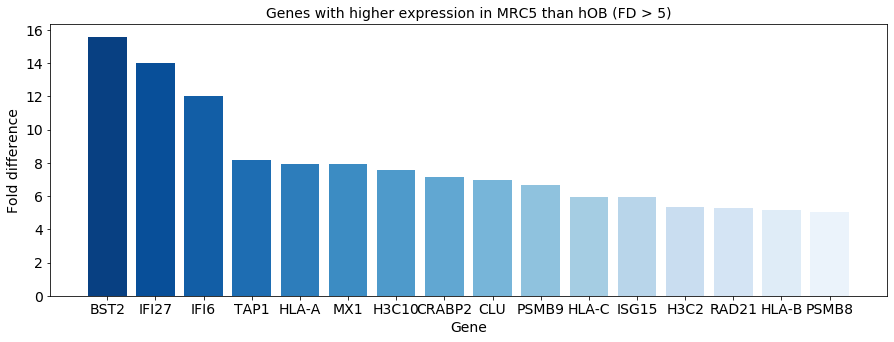

In [36]:
MRC5_up_vs_hOB_fc5 = []

# make list of tuples using MRC5_up_vs_hOB_genes_5 and MRC5_up_vs_hOB_fold_change_5
for i in range(len(MRC5_up_vs_hOB_genes_5)):
    MRC5_up_vs_hOB_fc5.append((MRC5_up_vs_hOB_genes_5[i], MRC5_up_vs_hOB_fold_change_5[i]))

# sort list of tuples by fold change
MRC5_up_vs_hOB_fc5.sort(key=lambda tup: tup[1], reverse=True)

# make list of colors for plot
colors = sns.color_palette("Blues_r", 16)

# plot top 10
plt.figure(figsize=(15, 5))
for i in range(len(MRC5_up_vs_hOB_fc5)):
    plt.bar(MRC5_up_vs_hOB_fc5[i][0], MRC5_up_vs_hOB_fc5[i][1], color= colors[i])

plt.title('Genes with higher expression in MRC5 than hOB (FD > 5)', fontsize=14)
plt.ylabel('Fold difference', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/MRC5_up_vs_hOB_fc5.png', dpi=300, bbox_inches='tight')

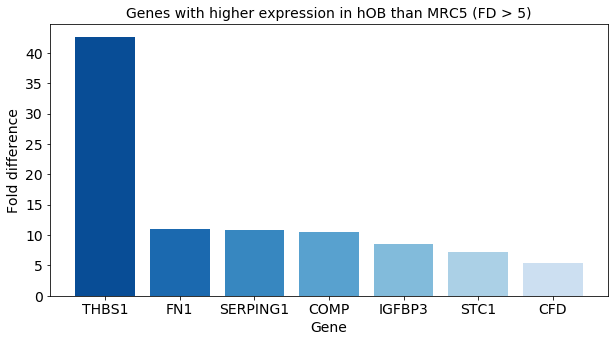

In [37]:
MRC5_down_vs_hOB_fc5 = []

# make list of tuples using MRC5_down_vs_hOB_genes_5 and MRC5_down_vs_hOB_fold_change_5
for i in range(len(MRC5_down_vs_hOB_genes_5)):
    MRC5_down_vs_hOB_fc5.append((MRC5_down_vs_hOB_genes_5[i], MRC5_down_vs_hOB_fold_change_5[i]))

# sort list of tuples by fold change
MRC5_down_vs_hOB_fc5.sort(key=lambda tup: tup[1], reverse=True)

colors = sns.color_palette("Blues_r", 8)

# plot all
plt.figure(figsize=(10, 5))
for i in range(len(MRC5_down_vs_hOB_fc5)):
    plt.bar(MRC5_down_vs_hOB_fc5[i][0], MRC5_down_vs_hOB_fc5[i][1], color= colors[i])

plt.title('Genes with higher expression in hOB than MRC5 (FD > 5)', fontsize=14)
plt.ylabel('Fold difference', fontsize=14)
plt.xlabel('Gene', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('../all_genes_figures/MRC5_down_vs_hOB_fc5.png', dpi=300, bbox_inches='tight')